<a href="https://colab.research.google.com/github/eaedk/Machine-Learning-Tutorials/blob/main/ML_Step_By_Step_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro
## General
Machine learning allows the user to feed a computer algorithm an immense amount of data and have the computer analyze and make data-driven recommendations and decisions based on only the input data. 
In most of the situations we want to have a machine learning system to make **predictions**, so we have several categories of machine learning tasks depending on the type of prediction needed: **Classification, Regression, Clustering, Generation**, etc.

**Classification** is the task whose goal is the prediction of the label of the class to which the input belongs (e.g., Classification of images in two classes: cats and dogs).
**Regression** is the task whose goal is the prediction of numerical value(s) related to the input (e.g., House rent prediction, Estimated time of arrival ).
**Generation** is the task whose goal is the creation of something new related to the input (e.g., Text translation, Audio beat generation, Image denoising ). **Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a **cluster**) are more similar (in some sense) to each other than to those in other **clusters** (e.g., Clients clutering).

In machine learning, there are learning paradigms that relate to one aspect of the dataset: **the presence of the label to be predicted**. **Supervised Learning** is the paradigm of learning that is applied when the dataset has the label variables to be predicted, known as ` y variables`. **Unsupervised Learning** is the paradigm of learning that is applied when the dataset has not the label variables to be predicted. **Self-supervised Learning** is the paradigm of learning that is applied when part of the X dataset is considere as the label to be predicted (e.g., the Dataset is made of texts and the model try to predict the next word of each sentence).

## Notebook overview

This notebook is a guide to start practicing Machine Learning.

## Project Title: Telco Customer Churn Prediction Using Machine Learning Models

## Project Description: To build a model that accurately predicts customer churn

## Hypothesis

### Null Hypothesis: Customers churn based on Online Security, Tech Support and Total Charges

### Alternate Hypothesis: Customers do not churn based on Online Security, Tech Support and Total Charges

## Questions

### 1. Do customers churn based on online security ?

### 2. Do customers churn based on tech support?

### 3. Do customers churn due to total charges?

### 4. Do customers churn due to monthly charges?

### 5. Does the payment  method contribute to why customers churn?
 
### 6. Does the billing method contribute to why customers churn?

### 7. Are customers churning based on the contract type?


# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [1]:
# !pip install -q <lib_001> <lib_002> ...

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [2]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix , classification_report, f1_score, accuracy_score,\
precision_score, recall_score, fbeta_score, make_scorer
from sklearn.model_selection import train_test_split

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os

import warnings
warnings.filterwarnings("ignore")

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [3]:
# For CSV, use pandas.read_csv
data=pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
#displaying max columns
# pd.set_option('display.max_columns', None)
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
#checking shape of data
data.shape

(7043, 21)

In [6]:
#checking duplicates
data.duplicated().sum()

0

In [7]:
#checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#checking null values in each column
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#totalcharges column has datatype object, let's convert to float
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
tc_df = data[data['TotalCharges'].isnull()]
tc_df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [11]:
def impute_charges(row):
    if row.TotalCharges is  None:
        value = row.tenure.astype(int) * row.MonthlyCharges.astype(int)
        return value
        

In [12]:
tc_df['TotalCharges'] = tc_df.apply(impute_charges, axis=1)

In [13]:
tc_df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55          None    No  
753                Mailed check          20.25          None    No  
936                Mailed check          80.85          None    No  
1082               Mailed check          25.75          None    No  
1340    Credit card (automatic)          56.05          None    No  
3331               Mailed check          19.85          None    No  
3826               Mailed check          25.35          None    No  
4380               Mailed check          20.00          None    No  
5218               Mailed check          19.7

In [14]:
#creating a function to find all unique values in the categorical dataframe
def unique_vals(cat_columns_df):
    unique_vals_dict={}
    for cols in cat_columns_df.columns:
        unique_vals_dict[cols]=cat_columns_df[cols].unique().tolist()
    return unique_vals_dict    
    

In [15]:
data.fillna(data['TotalCharges'].mean())

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

In [16]:
#creating a new dataframe containing only categorical data
cat_columns_df=data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]
cat_columns_df

gender  SeniorCitizen Partner Dependents PhoneService     MultipleLines  \
0     Female              0     Yes         No           No  No phone service   
1       Male              0      No         No          Yes                No   
2       Male              0      No         No          Yes                No   
3       Male              0      No         No           No  No phone service   
4     Female              0      No         No          Yes                No   
...      ...            ...     ...        ...          ...               ...   
7038    Male              0     Yes        Yes          Yes               Yes   
7039  Female              0     Yes        Yes          Yes               Yes   
7040  Female              0     Yes        Yes           No  No phone service   
7041    Male              1     Yes         No          Yes               Yes   
7042    Male              0      No         No          Yes                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod Churn  
0              Electronic check    No  
1                  Mailed check    No  
2                  Mailed check   Yes  
3     Bank transfer (automatic)    No  
4              Electronic check   Yes  
...                         ...   ...  
7038               Mailed check    No  
7039    Credit card (automatic)    No  
7040           Electronic check    No  
7041               Mailed check   Yes  
7042  Bank transfer (automatic)    No  

[7043 rows x 17 columns]

In [17]:
#calling function to return unique values
unique_values = unique_vals(cat_columns_df)

for cols, values in unique_values.items():
    print(f"{cols}:{values}")

gender:['Female', 'Male']
SeniorCitizen:[0, 1]
Partner:['Yes', 'No']
Dependents:['No', 'Yes']
PhoneService:['No', 'Yes']
MultipleLines:['No phone service', 'No', 'Yes']
InternetService:['DSL', 'Fiber optic', 'No']
OnlineSecurity:['No', 'Yes', 'No internet service']
OnlineBackup:['Yes', 'No', 'No internet service']
DeviceProtection:['No', 'Yes', 'No internet service']
TechSupport:['No', 'Yes', 'No internet service']
StreamingTV:['No', 'Yes', 'No internet service']
StreamingMovies:['No', 'Yes', 'No internet service']
Contract:['Month-to-month', 'One year', 'Two year']
PaperlessBilling:['Yes', 'No']
PaymentMethod:['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn:['No', 'Yes']


In [18]:
# change SeniorCitizen values from 0 and 1 to 'No' and 'Yes'
data['SeniorCitizen']=data['SeniorCitizen'].map({0:'No', 1:'Yes'})
data.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [20]:
# Code here
data.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

### Hypothesis Testing

In [21]:
contingency_data = pd.crosstab(data['OnlineSecurity'], data['Churn'])
contingency_data

Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295

In [22]:
from scipy.stats import chi2_contingency

In [23]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print(f'stat={stat:.3f}, p={p:.3f}')

stat=849.999, p=0.000


## Univariate Analysis

###  Visualizing all categorical columns

In [24]:
# def plot_categorical_columns(data):
#     data = data.drop(columns=['customerID'])
#     categorical_columns = data.select_dtypes(include='object').columns
#     for column in categorical_columns:
#         column_count = data[column].value_counts()
#         print(column_count)
#         plt.figure()
#         plt.tight_layout()
#         sns.set(rc={"figure.figsize":(8, 5)})
#         f, (ax_count) = plt.subplots(1)
#         plt.gca().set(xlabel= column,ylabel='count')
#         print(sns.countplot(x=data[column], ax=ax_count));
        


In [25]:
# def plot_categorical_columns(data):
#     """
#     Plot countplots for all categorical columns in a dataset.

#     Parameters:
#     data (pandas.DataFrame): The dataset to plot.

#     Returns:
#     None
#     """
#     # Get list of categorical columns
#     cat_cols = data.select_dtypes(include='object').columns.tolist()

#     # Loop through categorical columns and plot countplot
#     for col in cat_cols:
#         print(f"Value counts for column '{col}':\n{data[col].value_counts()}\n")
#         sns.countplot(data=data, x=col)


### Gender Column

In [26]:
#counting the total of unique values of  gender column
gender_count=data['gender'].value_counts()
gender_count

Male      3555
Female    3488
Name: gender, dtype: int64

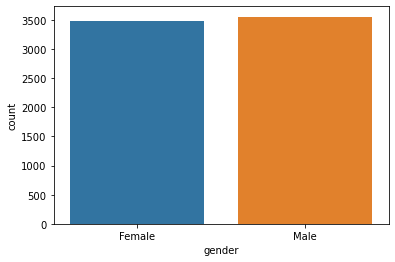

In [27]:
#plotting a countplot to visualize gender column
sns.countplot(x=data['gender']);

>- The male gender dominated the use of telco services with a total of 3555 againt 3488 of the female gender

### Senior Citizen Column

In [28]:
#counting the total of 'yes' and 'no' of SeniorCitizen column
SeniorCitizen_count=data['SeniorCitizen'].value_counts()
SeniorCitizen_count

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

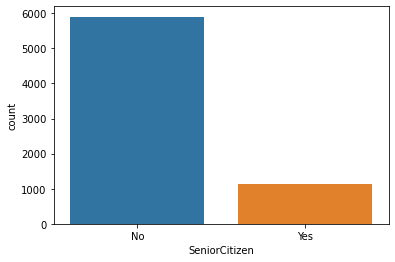

In [29]:
#plotting a countplot to visualize SeniorCitizen column
sns.countplot(x=data['SeniorCitizen']);

>-  The total of Senior Citizens who use telco services are few with a total of 1142 compared to those who aren't senior citizens

### Partner Column

In [30]:
#counting the total of 'yes' and 'no' of Partner column
Partner_count=data['Partner'].value_counts()
Partner_count

No     3641
Yes    3402
Name: Partner, dtype: int64

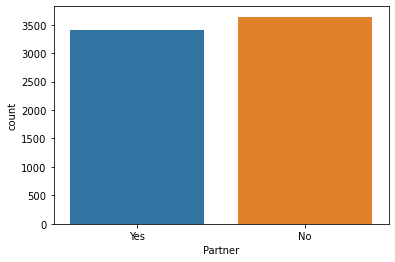

In [31]:
#plotting a countplot to visualize Partner column
sns.countplot(x=data['Partner']);

>- Customers without partners who use telco services are more with a total of 3641 than those who have partners.

### Dependents

In [32]:
#counting the total of 'yes' and 'no' of Dependents column
Dependents_count=data['Dependents'].value_counts()
Dependents_count

No     4933
Yes    2110
Name: Dependents, dtype: int64

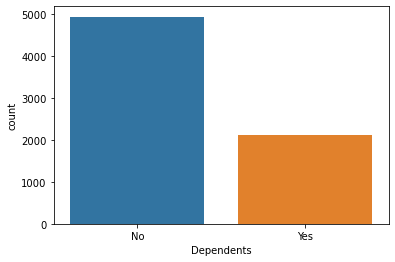

In [33]:
#plotting a countplot to visualize Dependents column
sns.countplot(x=data['Dependents']);

>- Few customers have dependants with a total of 2110 compared to those without dependants (4933)

### PhoneService Column

In [34]:
#counting the total of 'yes' and 'no' of PhoneService column
PhoneService_count=data['PhoneService'].value_counts()
PhoneService_count

Yes    6361
No      682
Name: PhoneService, dtype: int64

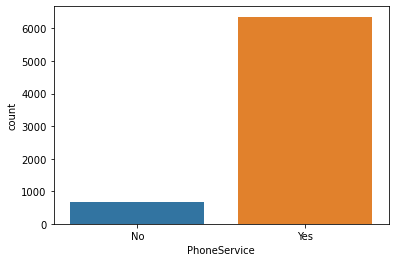

In [35]:
#plotting a countplot to visualize PhoneService column
sns.countplot(x=data['PhoneService']);

>- Customers who use phone services are more with a total of 6361 compared to those who don't use phone services(682)

### MultipleLines Column

In [36]:
#counting the total of unique values of  MultipleLines column
MultipleLines_count=data['MultipleLines'].value_counts()
MultipleLines_count

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

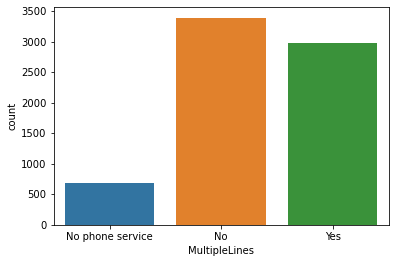

In [37]:
#plotting a countplot to visualize MultipleLines column
sns.countplot(x=data['MultipleLines']);

>- The number of customers who don't use multiple lines (3390) exceed those who use (2971) and those who have no phone service(682)

### InternetService Column

In [38]:
#counting the total of unique values of InternetService column
InternetService_count=data['InternetService'].value_counts()
InternetService_count

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

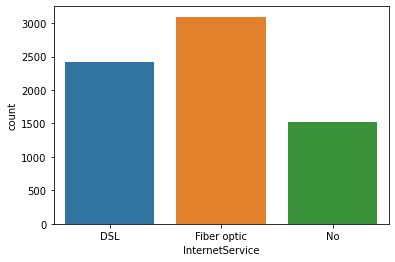

In [39]:
#plotting a countplot to visualize InternetService column
sns.countplot(x=data['InternetService']);


>- Customers tend to enjoy the use of fiber optic (3096) as a source of internet service than DSL (2421). Meanwhile, others (1526) have no internet service

### OnlineSecurity Column

In [40]:
#counting the total of unique values of OnlineSecurity column
OnlineSecurity_count=data['OnlineSecurity'].value_counts()
OnlineSecurity_count

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

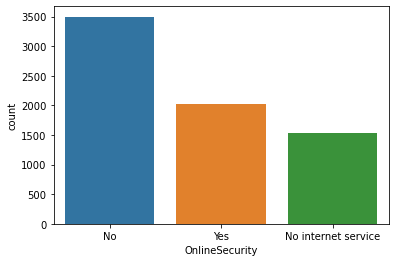

In [41]:
#plotting a countplot to visualize OnlineSecurity column
sns.countplot(x=data['OnlineSecurity']);

>- Customers with No online security (3498) exceed those who have (2019) and those with no internet service(1526)

### OnlineBackup Column

In [42]:
#counting the total of unique values of OnlineBackup column
OnlineBackup_count=data['OnlineBackup'].value_counts()
OnlineBackup_count

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

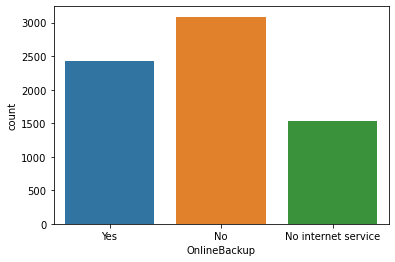

In [43]:
#plotting a countplot to visualize OnlineBackup column
sns.countplot(x=data['OnlineBackup']);

>- Customers with online backup (2429) are less than those without online backup (3088) while quite a number had no internet service (1526)

### DeviceProtection Column

In [44]:
#counting the total of unique values of DeviceProtection column
DeviceProtection_count=data['DeviceProtection'].value_counts()
DeviceProtection_count

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

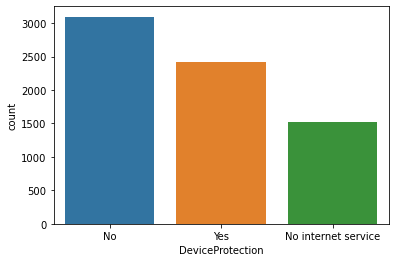

In [45]:
#plotting a countplot to visualize DeviceProtectioncolumn
sns.countplot(x=data['DeviceProtection']);

>- Customers without device protection (3095) were more than those who had (2422) and those who had no internet service(1526)

### TechSupport Column

In [46]:
#counting the total of unique values of TechSupportcolumn
TechSupport_count=data['TechSupport'].value_counts()
TechSupport_count

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

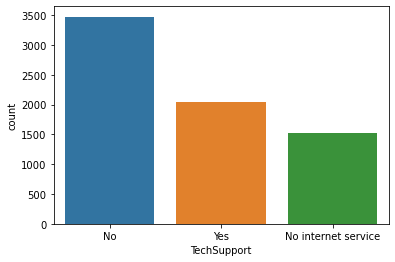

In [47]:
#plotting a countplot to visualize TechSupport column
sns.countplot(x=data['TechSupport']);

>- Customers who didn't recieve tech support (3473) were more than those who had (2044) and those with no internet service(1526)

### StreamingTV

In [48]:
#counting the total of  unique values of StreamingTV column
StreamingTV_count=data['StreamingTV'].value_counts()
StreamingTV_count


No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

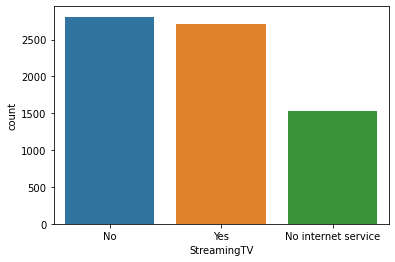

In [49]:
#plotting a countplot to visualize StreamingTV column
sns.countplot(x=data['StreamingTV']);

>- Customers who didn't use Telco services to stream tv (2810) were a little above those who did (2707). Meanwhile some had no internet service to stream tv (1526)

### StreamingMovies

In [50]:
#counting the total of unique values of StreamingMovies column
StreamingMovies_count=data['StreamingMovies'].value_counts()
StreamingMovies_count


No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

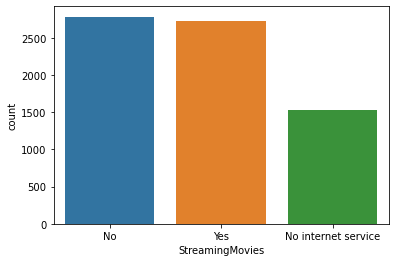

In [51]:
#plotting a countplot to visualize StreamingMovies column
sns.countplot(x=data['StreamingMovies']);

>- Customers who didn't use Telco services to stream movies (2785) were a little above those who did (2732). Meanwhile some had no internet service to stream movies (1526)

### Contract

In [52]:
#counting the total of unique values of Dependents column
Contract_count=data['Contract'].value_counts()
Contract_count


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

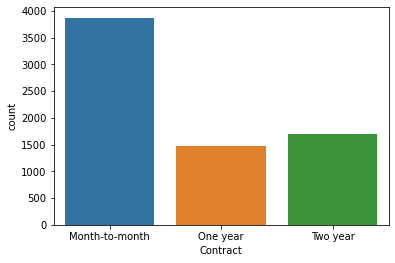

In [53]:
#plotting a countplot to visualize Contract column
sns.countplot(x=data['Contract']);

>- Customers who had subscribed for a month-to-month (3875) telco services were more than those with two years(1695) and  one year (1473) subscription

### PaperlessBilling

In [54]:
#counting the total of 'yes' and 'no' of  PaperlessBilling column
PaperlessBilling_count=data['PaperlessBilling'].value_counts()
PaperlessBilling_count


Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

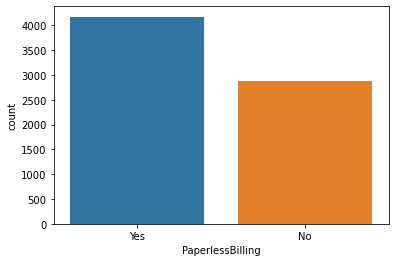

In [55]:
#plotting a countplot to visualize PaperlessBilling column
sns.countplot(x=data['PaperlessBilling']);

>- The total customers who used paperless billing system (4171) were more than those who did not (2872)

### PaymentMethod

In [56]:
#counting the total of unique values of PaymentMethod column
PaymentMethod_count=data['PaymentMethod'].value_counts()
PaymentMethod_count


Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

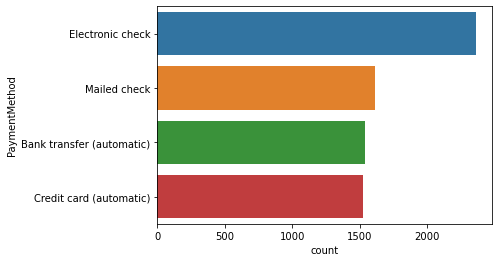

In [57]:
#plotting a countplot to visualize PaymentMethod column
sns.countplot(y=data['PaymentMethod']);

>- Customers tend to use the electronic check (2365) payment method more than the other payment methods which are  mailed check (1612),  bank transfer (automatic) (1544)  and credit card (automatic) (1522).

### Churn

In [58]:
#counting the total of 'yes' and 'no' of Churn column
Churn_count=data['Churn'].value_counts()
Churn_count


No     5174
Yes    1869
Name: Churn, dtype: int64

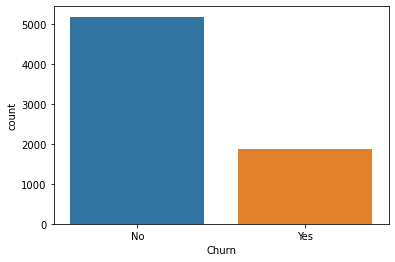

In [59]:
#plotting a countplot to visualize Churn column
sns.countplot(x=data['Churn']);

>- Customers who churn (1869) are less than those who do not (5174)

### 1. Do customers churn based on online security ?

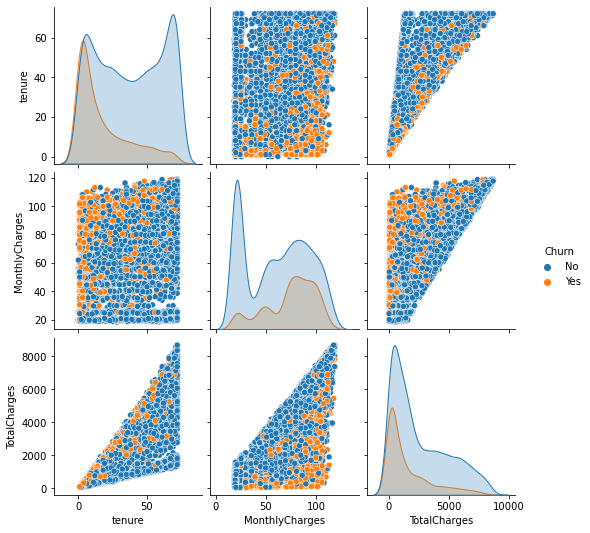

In [60]:
sns.pairplot(data, hue='Churn')

In [61]:
data.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [62]:
#Churn based on online security
label=data['OnlineSecurity'].unique()
value=data['OnlineSecurity'].value_counts()

fig=go.Figure(data=[go.Pie(labels=label, values=value)])
fig.show()              


In [63]:
fig = px.histogram(data, x="OnlineSecurity", color="Churn", title="Customer Churn Based on OnlineSecurity")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

>- With regards to OnlineSecurity, customers will either churn or not churn based on whether they have subscribed to the service or not. From the visualization, it can be seen that customers with no onlinesecurity are not churning, and it's same for those with onlinesecurity and those with no internet service. 

>- We can say that customers do not churn based on OnlineSecurity services by the Telco Company.

### 3. Do customers churn based on Tech support?

In [64]:
#Churn based on tech support
label=data['TechSupport'].unique()
value=data['TechSupport'].value_counts()

fig=go.Figure(data=[go.Pie(labels=label, values=value)])
fig.show()              


In [65]:
fig = px.histogram(data, x="TechSupport", color="Churn", title="Customer Churn Based on TechSupport")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

>- With regards to TechSupport, customers will either churn or not churn based on whether they have subscribed to the service or not. From the visualization, it can be seen that customers with no tech support are not churning, and it's same for those with onlinesecurity and those with no internet service. 

>- We can say that customers do not churn based on TechSupport services by the Telco Company.

### 3. Do customers churn due to total charges?

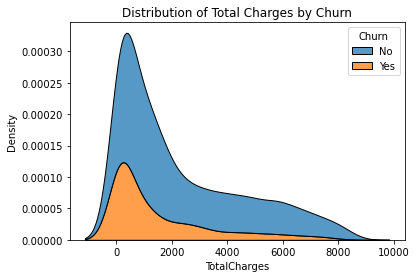

In [66]:
sns.kdeplot(data=data, x="TotalCharges", hue="Churn", multiple='stack')
plt.title('Distribution of Total Charges by Churn');

>- Customers whith high total charges do not churn. This may be due to the services they're recieving.

### 4. Do customers churn due to monthly charges?

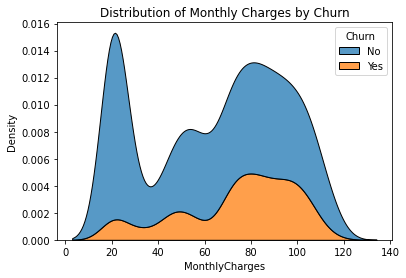

In [67]:
sns.kdeplot(data=data, x="MonthlyCharges", hue="Churn", multiple='stack')
plt.title('Distribution of Monthly Charges by Churn');

>- Customers whith high monthly charges do not churn. This may be due to the services they're recieving.

### 5. Does the payment  method contribute to why customers churn?

In [68]:
fig = px.histogram(data, x="PaymentMethod", color="Churn", title="Customer Churn Based on Payment Method")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

>- Customers are not likely to churn based on payment method

### 6. Does the billing method contribute to why customers churn?

In [69]:
fig = px.histogram(data, x="PaperlessBilling", color="Churn", title="Customer Churn Based on PaperlessBilling")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

>- Customers are not churning based on billing system

### 7. Are customers churning based on the contract type?

In [70]:
fig = px.histogram(data, x="Contract", color="Churn", title="Customer Churn Based on Contract")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

>- Customers are not churning based on contract type

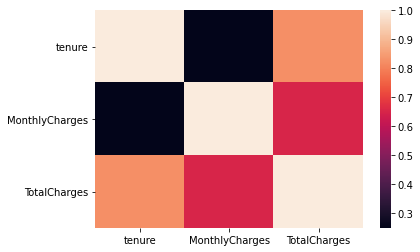

In [71]:
#visualizing correlation between numerical columns in dataset
sns.heatmap(data.corr());

### What is the Avearage Total Charges for Senior Citizens and Non Senior Citizens

In [72]:
senior_mean = data.groupby(['SeniorCitizen'])['TotalCharges'].mean()
senior_mean

SeniorCitizen
No     2181.089550
Yes    2810.465193
Name: TotalCharges, dtype: float64

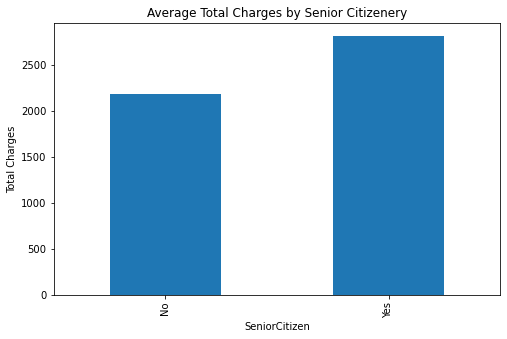

In [73]:
plt.figure(figsize=(8, 5))
senior_mean.plot(kind='bar')
plt.ylabel('Total Charges')
plt.title('Average Total Charges by Senior Citizenery');

### What is the Avearage Total Charges for each Gender

In [74]:
gender_mean = data.groupby(['gender'])['TotalCharges'].mean()
gender_mean

gender
Female    2283.190985
Male      2283.407861
Name: TotalCharges, dtype: float64

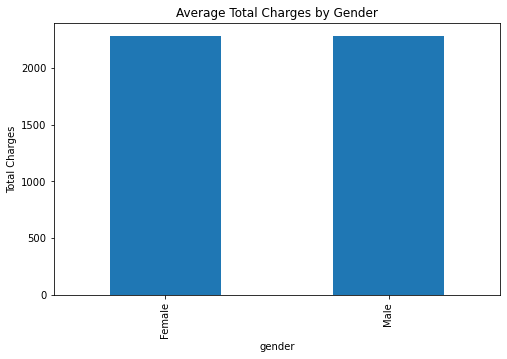

In [75]:
plt.figure(figsize=(8, 5))
gender_mean.plot(kind='bar')
plt.ylabel('Total Charges')
plt.title('Average Total Charges by Gender');

### From the EDA performed we realized that the data is imbalanced since the number of customers who aren't churning made up the majority of the dataset. 

###  In dealing with this issue: 

### 1. All other evalustion metrics will be used excerpt 'accuracy' since it will only the majority class
### 2. The type of machine learning algorithms that will be used are the Tree based models. These algorithms work by learning a hierarchy of if/else questions. This can force both classes to be addressed.

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [76]:
# Use pandas.DataFrame.drop_duplicates method

>- There are no duplicates in the train data

In [77]:
# display columns in dataframe
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [78]:
#checking for duplicates in data
data.duplicated().sum()

0

## Dataset Splitting

In [79]:
# display churn column
data = data.drop(columns=['customerID'])
data['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [80]:
#  change values in churn column into numerical data
data['Churn'] = (data['Churn'] == 'Yes').astype(bool).astype(int)
data['Churn'].unique()

array([0, 1])

In [81]:
# Use train_test_split with a random_state, and add stratify for Classification

#spliting data into  80% train and  20% test

train, test = train_test_split(data, test_size=0.2, random_state=42)

In [82]:
# check and confirm the shape of the train and test data
train.shape, test.shape

((5634, 20), (1409, 20))

In [84]:
# create features and targets from the train and test
X_train = train.drop(columns=['Churn'])
y_train = train['Churn'].copy()

X_test = test.drop(columns=['Churn'])
y_test = test['Churn'].copy()


In [85]:
# display head fo the train features dataframe
X_train.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
2142  Female            No      No        Yes      21          Yes   
1623  Female            No      No         No      54          Yes   
6074    Male            No     Yes         No       1           No   
1362    Male            No      No         No       4          Yes   
1212    Male            No      No         No       7          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
2142                No             DSL            Yes           No   
1623               Yes     Fiber optic             No          Yes   
6074  No phone service             DSL             No           No   
1362                No     Fiber optic             No           No   
1212                No     Fiber optic             No           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
2142              Yes          No          No             Yes        One year   
1623               No          No         Yes             Yes        Two year   
6074               No          No          No              No  Month-to-month   
1362               No          No          No              No  Month-to-month   
1212               No          No          No              No  Month-to-month   

     PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
2142               No               Mailed check           64.85       1336.80  
1623              Yes  Bank transfer (automatic)           97.20       5129.45  
6074              Yes           Electronic check           23.45         23.45  
1362              Yes           Electronic check           70.20        237.95  
1212              Yes           Electronic check           69.55        521.35

In [86]:
# displayhead for the test features dataframe

X_test.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
185   Female            No     Yes         No       1           No   
2715    Male            No      No         No      41          Yes   
3825  Female            No     Yes        Yes      52          Yes   
1807  Female            No      No         No       1          Yes   
132     Male            No      No         No      67          Yes   

         MultipleLines InternetService       OnlineSecurity  \
185   No phone service             DSL                   No   
2715               Yes              No  No internet service   
3825                No              No  No internet service   
1807                No     Fiber optic                   No   
132                 No             DSL                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
185                    No                   No                   No   
2715  No internet service  No internet service  No internet service   
3825  No internet service  No internet service  No internet service   
1807                   No                  Yes                   No   
132                    No                   No                  Yes   

              StreamingTV      StreamingMovies        Contract  \
185                    No                   No  Month-to-month   
2715  No internet service  No internet service  Month-to-month   
3825  No internet service  No internet service        Two year   
1807                   No                   No  Month-to-month   
132                    No                   No        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
185               Yes           Electronic check           24.80         24.80  
2715              Yes  Bank transfer (automatic)           25.25        996.45  
3825               No               Mailed check           19.35       1031.70  
1807               No           Electronic check           76.35         76.35  
132                No  Bank transfer (automatic)           50.55       3260.10

## New Features Creation

In [87]:
# filter and display dataframe where totalcharges is null
data[data['TotalCharges'].isnull()]

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female            No     Yes        Yes       0           No   
753     Male            No      No        Yes       0          Yes   
936   Female            No     Yes        Yes       0          Yes   
1082    Male            No     Yes        Yes       0          Yes   
1340  Female            No     Yes        Yes       0           No   
3331    Male            No     Yes        Yes       0          Yes   
3826    Male            No     Yes        Yes       0          Yes   
4380  Female            No     Yes        Yes       0          Yes   
5218    Male            No     Yes        Yes       0          Yes   
6670  Female            No     Yes        Yes       0          Yes   
6754    Male            No      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)           52.55           NaN      0  
753                Mailed check           20.25           NaN      0  
936                Mailed check           80.85           NaN      0  
1082               Mailed check           25.75           NaN      0  
1340    Credit card (automatic)           56.05           NaN      0  
3331               Mailed check           19.85           NaN      0  
3826               Mailed check           25.35           NaN      0  
4380               Mailed check           20.00           NaN 

In [88]:
# X_train['Monthly Variations'] = (X_train.loc[:, 'TotalCharges']) -((X_train.loc[:, 'tenure'] * X_train.loc[:, 'MonthlyCharges']))
# X_test['Monthly Variations'] =  (X_test.loc[:, 'TotalCharges']) - ((X_test.loc[:, 'tenure'] * X_test.loc[:, 'MonthlyCharges']))

In [178]:
labels = ['{0}-{1}'.format(i, i+2) for i in range(0, data['tenure'].max()+1, 3)]
labels
X_train['tenure_group'] = pd.cut(X_train['tenure'], labels=labels, bins=range(0, 78, 3))
X_test['tenure_group'] = pd.cut(X_test['tenure'], labels=labels, bins=range(0, 78, 3))

In [179]:
w

2142    18-20
1623    51-53
6074      0-2
1362      3-5
1212      6-8
        ...  
3772      0-2
5191    21-23
5226     9-11
5390     9-11
860     24-26
Name: tenure, Length: 5624, dtype: category
Categories (25, object): ['0-2' < '3-5' < '6-8' < '9-11' ... '63-65' < '66-68' < '69-71' < '72-74']

## Create Pipeline to Impute Missing Values, Encode columns and Scale Columns

In [89]:
# Use sklearn.impute.SimpleImputer

In [90]:
# check the number of misssing values in the train data
X_train.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [91]:
# select the categorical columns from train and test data for encoding
train_cat_cols = X_train.select_dtypes(include=['object', 'category']).columns
test_cat_cols = X_test.select_dtypes(include=['object', 'category']).columns

In [92]:
# coonfirm if categorical columns are same for test and train data
train_cat_cols == test_cat_cols

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [93]:
# select numerical columns from the train and test dataset
train_num_cols=X_train.select_dtypes(exclude=['object', 'category']).columns
test_num_cols=X_test.select_dtypes(exclude=['object', 'category']).columns
test_num_cols, train_num_cols

(Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'),
 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))

In [94]:
# create variables to hold numerical and categorical columns 
num_attribs = list(train_num_cols)
cat_attribs = train_cat_cols

In [95]:
#create a numerical pipeline to standardize and impute the missinf in the numerical columns
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy="constant", fill_value=0)),('std_scaler', StandardScaler())])

#create a categorical pipeline to encode and impute the missing in the numerical columns
cat_pipeline = Pipeline([('imputer',SimpleImputer(strategy="most_frequent")),('cat_encoder', OneHotEncoder())])

In [96]:
# Create a fullpipeline by combining numerical and catagorical pioeline
full_pipeline = ColumnTransformer([("numerical",num_pipeline, num_attribs), ("categorical",cat_pipeline, cat_attribs) ], remainder='passthrough')

In [97]:
# use create pipeline to transform train and test features
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.fit_transform(X_test)

In [98]:
X_test_prepared

array([[-1.25116117, -1.3138304 , -0.97642505, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.34336719, -1.29887982, -0.55043103, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78186249, -1.49489851, -0.5349766 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.61334983, -1.47662558, -0.84272786, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.45953704, -0.67760026,  0.31047895, ...,  1.        ,
         0.        ,  0.        ],
       [-1.25116117, -1.09621644, -0.97355338, ...,  0.        ,
         0.        ,  1.        ]])

In [99]:
# convert to dataframe
# X_train_ = pd.DataFrame(X_train_prepared.toarray(), columns=)

In [100]:
# get categorical columns after transformation
cat_features = full_pipeline.named_transformers_['categorical']['cat_encoder'].get_feature_names()
cat_features

array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_No', 'x2_Yes',
       'x3_No', 'x3_Yes', 'x4_No', 'x4_Yes', 'x5_No',
       'x5_No phone service', 'x5_Yes', 'x6_DSL', 'x6_Fiber optic',
       'x6_No', 'x7_No', 'x7_No internet service', 'x7_Yes', 'x8_No',
       'x8_No internet service', 'x8_Yes', 'x9_No',
       'x9_No internet service', 'x9_Yes', 'x10_No',
       'x10_No internet service', 'x10_Yes', 'x11_No',
       'x11_No internet service', 'x11_Yes', 'x12_No',
       'x12_No internet service', 'x12_Yes', 'x13_Month-to-month',
       'x13_One year', 'x13_Two year', 'x14_No', 'x14_Yes',
       'x15_Bank transfer (automatic)', 'x15_Credit card (automatic)',
       'x15_Electronic check', 'x15_Mailed check'], dtype=object)

In [101]:
# Create a new datframe for the train and test feature
labels = np.concatenate([train_num_cols, cat_features])
X_train_ = pd.DataFrame(X_train_prepared, columns=labels)
X_test_ = pd.DataFrame(X_test_prepared, columns=labels)

## Optional: Train Dataset Balancing 

In [102]:
# Count the number of unique values in the target
y_train.value_counts()

0    4128
1    1496
Name: Churn, dtype: int64

In [103]:
# import the SMOTE technique to oversample the minority
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [104]:
# Create an instance of SMOTE and fit it on the train feature and targets
sm = SMOTE(sampling_strategy='minority')
X_train_, y_train = sm.fit_resample(X_train_, y_train)

In [105]:
# let's confirm the increase in rows after oversampling
len(X_train_), len(y_train)

(8256, 8256)

In [106]:
# Confirm values counts for the targets
y_train.value_counts()

0    4128
1    4128
Name: Churn, dtype: int64

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Decision Tree

Please, keep the following structure to try all the model you want.

### Create the Model

In [107]:

from sklearn.tree import DecisionTreeClassifier
# let's create a decision tree model
dtree = DecisionTreeClassifier(criterion='gini', random_state=100, min_samples_leaf=8, max_depth=6 )

### Train the Model

In [108]:
# Use the .fit method to train the model
dtree.fit(X_train_, y_train)

DecisionTreeClassifier(random_state=126)

### Evaluate the Model on the Evaluation dataset (Evalset)

In [109]:
def evaluate_model(model, test, y_true):
    # Compute the valid metrics for the use case # Optional: show the classification report
    pred = model.predict(test)
    F1 = f1_score(y_true, pred)
    accuracy = accuracy_score(y_true, pred)
    precision = precision_score(y_true, pred)
    recall = recall_score(y_true, pred)
    F2 = fbeta_score(y_true, pred, beta=2.0)
 
    print("classification report : \n", classification_report(y_true, pred))
    cf = confusion_matrix(y_true, pred)
    print("Cofusion matrix report : \n", pd.DataFrame(cf, index=['Negatives', 'Positives']))
    sns.heatmap(cf, annot=True)

    return accuracy, precision, recall, F1, F2, pred

classification report : 
               precision    recall  f1-score   support

           0       0.83      0.74      0.79      1035
           1       0.45      0.58      0.51       373

    accuracy                           0.70      1408
   macro avg       0.64      0.66      0.65      1408
weighted avg       0.73      0.70      0.71      1408

Cofusion matrix report : 
              0    1
Negatives  770  265
Positives  155  218


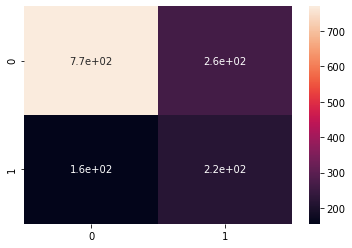

In [110]:
accuracy_dtree, precision_tree, recall_dtree, F1_dtree, F2_dtree, dtree_pred = evaluate_model(dtree, X_test_, y_test)

In [111]:
results = pd.DataFrame([['Decision Tree', accuracy_dtree, precision_tree, recall_dtree, F1_dtree, F2_dtree]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score'])
results

Model  Accuracy  Precision   Recall  F1_score  F2_score
0  Decision Tree  0.701705   0.451346  0.58445  0.509346  0.551899

In [112]:
def get_features_importance(model, train_features):
    features_df = pd.DataFrame(model.feature_importances_, index=train_features.columns, columns=['Weight Of Importance'])
    features_df = features_df.sort_values(by='Weight Of Importance', ascending=False)
    features_fi_cols = features_df.index.tolist()[:40]
    plt.figure(figsize=(6,20))
    plt.barh(train_features.columns, model.feature_importances_)
    plt.show()
    return features_fi_cols


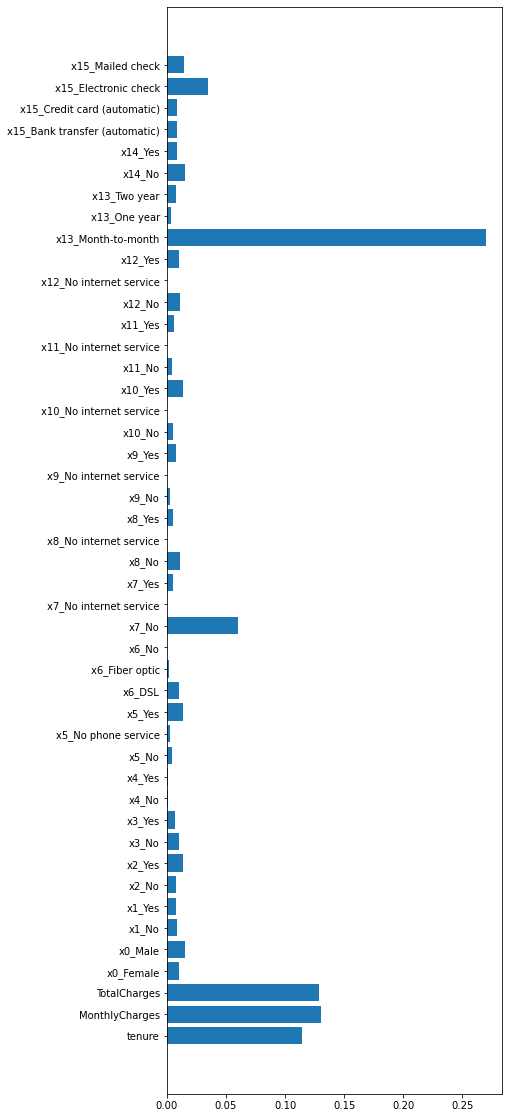

In [113]:
fi_dtree = get_features_importance(dtree, X_train_)

In [114]:
fi_dtree

['x13_Month-to-month',
 'MonthlyCharges',
 'TotalCharges',
 'tenure',
 'x7_No',
 'x15_Electronic check',
 'x14_No',
 'x0_Male',
 'x15_Mailed check',
 'x2_Yes',
 'x10_Yes',
 'x5_Yes',
 'x12_No',
 'x8_No',
 'x6_DSL',
 'x0_Female',
 'x3_No',
 'x12_Yes',
 'x14_Yes',
 'x15_Credit card (automatic)',
 'x15_Bank transfer (automatic)',
 'x1_No',
 'x13_Two year',
 'x2_No',
 'x1_Yes',
 'x9_Yes',
 'x3_Yes',
 'x11_Yes',
 'x8_Yes',
 'x10_No',
 'x7_Yes',
 'x5_No',
 'x11_No',
 'x13_One year',
 'x9_No',
 'x5_No phone service',
 'x6_Fiber optic',
 'x4_Yes',
 'x4_No',
 'x9_No internet service']

### Train model with only features of Importance

In [115]:
# Get the only the feature with great importance
X_train_fi = X_train_.loc[:, fi_dtree]
X_test_fi = X_test_.loc[:, fi_dtree]

# print the shape to confirm and display the head of the new dataframe
print(X_train_fi.shape)
X_train_fi.head()

(8256, 40)


x13_Month-to-month  MonthlyCharges  TotalCharges    tenure  x7_No  \
0                 0.0       -0.002049     -0.421730 -0.468357    0.0   
1                 0.0        1.073455      1.254246  0.883777    1.0   
2                 1.0       -1.378428     -1.002101 -1.287832    1.0   
3                 1.0        0.175817     -0.907313 -1.164911    1.0   
4                 1.0        0.154207     -0.782078 -1.041990    1.0   

   x15_Electronic check  x14_No  x0_Male  x15_Mailed check  x2_Yes  ...  \
0                   0.0     1.0      0.0               1.0     0.0  ...   
1                   0.0     0.0      0.0               0.0     0.0  ...   
2                   1.0     0.0      1.0               0.0     1.0  ...   
3                   1.0     0.0      1.0               0.0     0.0  ...   
4                   1.0     0.0      1.0               0.0     0.0  ...   

   x7_Yes  x5_No  x11_No  x13_One year  x9_No  x5_No phone service  \
0     1.0    1.0     1.0           1.0    0.0                  0.0   
1     0.0    0.0     0.0           0.0    1.0                  0.0   
2     0.0    0.0     1.0           0.0    1.0                  1.0   
3     0.0    1.0     1.0           0.0    1.0                  0.0   
4     0.0    1.0     1.0           0.0    1.0                  0.0   

   x6_Fiber optic  x4_Yes  x4_No  x9_No internet service  
0             0.0     1.0    0.0                     0.0  
1             1.0     1.0    0.0                     0.0  
2             0.0     0.0    1.0                     0.0  
3             1.0     1.0    0.0                     0.0  
4             1.0     1.0    0.0                     0.0  

[5 rows x 40 columns]

In [116]:
# create a second Decision tree model
dtree_2 = DecisionTreeClassifier(criterion='gini', random_state=100, min_samples_leaf=8, max_depth=6)

In [117]:
# Train the model
dtree_2.fit(X_train_fi, y_train)

DecisionTreeClassifier()

classification report : 
               precision    recall  f1-score   support

           0       0.84      0.75      0.79      1035
           1       0.46      0.60      0.53       373

    accuracy                           0.71      1408
   macro avg       0.65      0.68      0.66      1408
weighted avg       0.74      0.71      0.72      1408

Cofusion matrix report : 
              0    1
Negatives  776  259
Positives  148  225


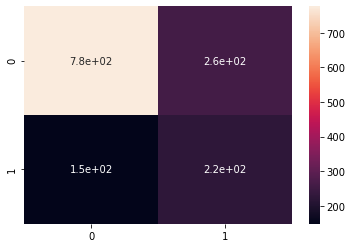

In [118]:
# get the acccuaracy, f1 score, recall, and precision
accuracy_dtree_2, precision_tree_2, recall_dtree_2, F1_dtree_2, F2_dtree_2, dtree_pred_2 = evaluate_model(dtree_2, X_test_fi, y_test)

### Predict on a unknown dataset (Testset)

In [119]:
# Use .predict method # .predict_proba is available just for classification

In [120]:
model_result = pd.DataFrame([['Decision Tree(With Only Feature of Importance)', accuracy_dtree_2, precision_tree_2, recall_dtree_2, F1_dtree_2, F2_dtree_2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score'])
results = results.append(model_result)

In [121]:
results

Model  Accuracy  Precision  \
0                                   Decision Tree  0.701705   0.451346   
0  Decision Tree(With Only Feature of Importance)  0.710938   0.464876   

     Recall  F1_score  F2_score  
0  0.584450  0.509346  0.551899  
0  0.603217  0.525088  0.569332

## Random Forest

### Create the Model

In [122]:
# Code here

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini', random_state=100, min_samples_leaf=8, max_depth=6, n_samples=100)

### Train the Model

In [123]:
# Use the .fit method
rfc.fit(X_train_, y_train)

RandomForestClassifier()

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.62      0.59      0.61       373

    accuracy                           0.80      1408
   macro avg       0.74      0.73      0.73      1408
weighted avg       0.79      0.80      0.79      1408

Cofusion matrix report : 
              0    1
Negatives  901  134
Positives  153  220


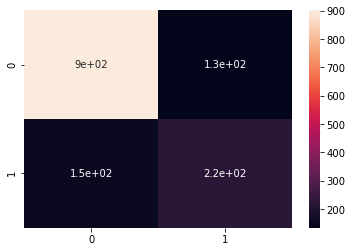

In [124]:
accuracy_rfc, precision_rfc, recall_rfc, F1_rfc, F2_rfc, rfc_pred = evaluate_model(rfc, X_test_, y_test)

In [125]:
model_results = pd.DataFrame([['Random Forest', accuracy_rfc, precision_rfc, recall_rfc, F1_rfc, F2_rfc]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Precision  \
0                                   Decision Tree  0.701705   0.451346   
1  Decision Tree(With Only Feature of Importance)  0.710938   0.464876   
2                                   Random Forest  0.796165   0.621469   

     Recall  F1_score  F2_score  
0  0.584450  0.509346  0.551899  
1  0.603217  0.525088  0.569332  
2  0.589812  0.605227  0.595883

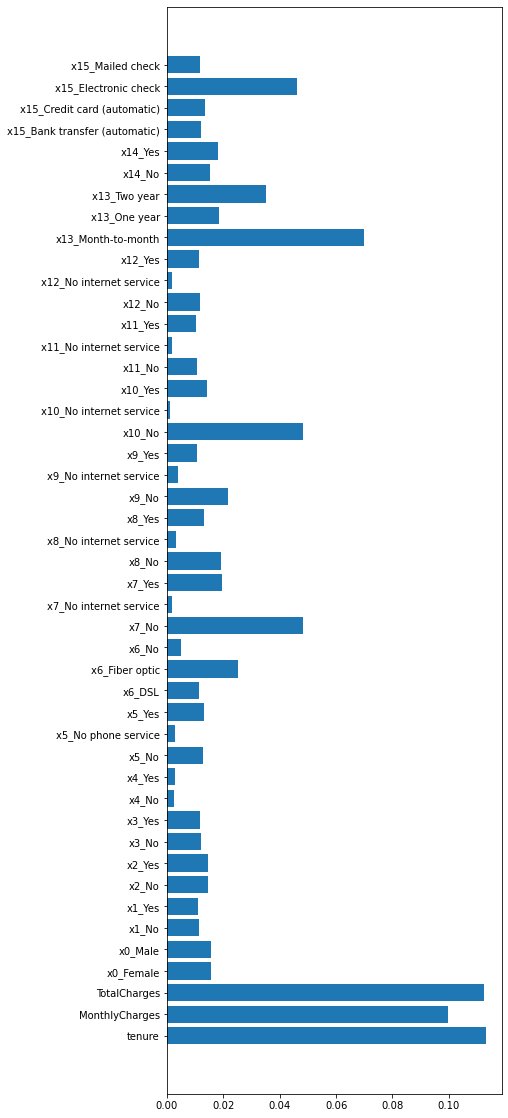

In [126]:
fi_rfc = get_features_importance(rfc, X_train_)

In [127]:
len(fi_rfc)

40

### Train model with only features of Importance

In [128]:
X_train_fi = X_train_.loc[:, fi_rfc]
X_test_fi = X_test_.loc[:, fi_rfc]

print(X_train_fi.shape)
X_train_fi.head()

(8256, 40)


tenure  TotalCharges  MonthlyCharges  x13_Month-to-month  x7_No  x10_No  \
0 -0.468357     -0.421730       -0.002049                 0.0    0.0     1.0   
1  0.883777      1.254246        1.073455                 0.0    1.0     1.0   
2 -1.287832     -1.002101       -1.378428                 1.0    1.0     1.0   
3 -1.164911     -0.907313        0.175817                 1.0    1.0     1.0   
4 -1.041990     -0.782078        0.154207                 1.0    1.0     1.0   

   x15_Electronic check  x13_Two year  x6_Fiber optic  x9_No  ...  x6_DSL  \
0                   0.0           0.0             0.0    0.0  ...     1.0   
1                   0.0           1.0             1.0    1.0  ...     0.0   
2                   1.0           0.0             0.0    1.0  ...     1.0   
3                   1.0           0.0             1.0    1.0  ...     0.0   
4                   1.0           0.0             1.0    1.0  ...     0.0   

   x1_No  x1_Yes  x11_No  x9_Yes  x11_Yes  x6_No  x9_No internet service  \
0    1.0     0.0     1.0     1.0      0.0    0.0                     0.0   
1    1.0     0.0     0.0     0.0      1.0    0.0                     0.0   
2    1.0     0.0     1.0     0.0      0.0    0.0                     0.0   
3    1.0     0.0     1.0     0.0      0.0    0.0                     0.0   
4    1.0     0.0     1.0     0.0      0.0    0.0                     0.0   

   x8_No internet service  x4_Yes  
0                     0.0     1.0  
1                     0.0     1.0  
2                     0.0     0.0  
3                     0.0     1.0  
4                     0.0     1.0  

[5 rows x 40 columns]

In [129]:
rfc_2 = RandomForestClassifier(criterion='gini', random_state=100, min_samples_leaf=8, max_depth=6, n_samples=100)

In [130]:
rfc_2.fit(X_train_fi, y_train)

RandomForestClassifier()

classification report : 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1035
           1       0.60      0.57      0.58       373

    accuracy                           0.78      1408
   macro avg       0.72      0.72      0.72      1408
weighted avg       0.78      0.78      0.78      1408

Cofusion matrix report : 
              0    1
Negatives  892  143
Positives  160  213


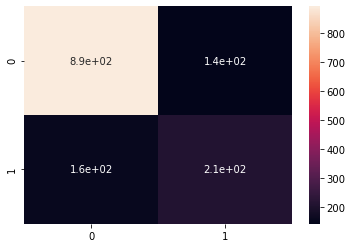

In [131]:
accuracy_rfc_2, precision_rfc_2, recall_rfc_2, F1_rfc_2, F2_rfc_2,  rfc_pred_2 = evaluate_model(rfc_2, X_test_fi, y_test)

### Predict on a unknown dataset (Testset)

In [132]:
# Use .predict method # .predict_proba is available just for classification

In [133]:
model_results = pd.DataFrame([['Random Forest(With Only features of Importance)', accuracy_rfc_2, precision_rfc_2, recall_rfc_2, F1_rfc_2, F2_rfc_2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)


In [134]:
results

Model  Accuracy  Precision  \
0                                    Decision Tree  0.701705   0.451346   
1   Decision Tree(With Only Feature of Importance)  0.710938   0.464876   
2                                    Random Forest  0.796165   0.621469   
3  Random Forest(With Only features of Importance)  0.784801   0.598315   

     Recall  F1_score  F2_score  
0  0.584450  0.509346  0.551899  
1  0.603217  0.525088  0.569332  
2  0.589812  0.605227  0.595883  
3  0.571046  0.584362  0.576299

## Support Vector Machine

### Create the Model

In [135]:
# Create the svm  model
from sklearn import svm
svm = svm.SVC()

### Train the Model

In [136]:
# Use the .fit method
svm.fit(X_train_, y_train)

SVC()

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.90      0.78      0.84      1035
           1       0.55      0.75      0.64       373

    accuracy                           0.77      1408
   macro avg       0.73      0.77      0.74      1408
weighted avg       0.81      0.77      0.78      1408

Cofusion matrix report : 
              0    1
Negatives  811  224
Positives   94  279


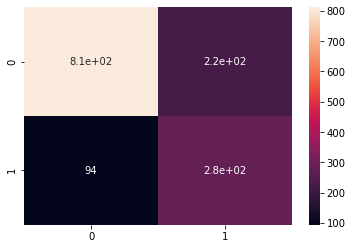

In [137]:
accuracy_svm, precision_svm, recall_svm, F1_svm, F2_svm, svm_pred = evaluate_model(svm, X_test_, y_test)

### Predict on a unknown dataset (Testset)

In [138]:
# Use .predict method # .predict_proba is available just for classification

In [139]:
model_results = pd.DataFrame([['Support Vector Machine', accuracy_svm, precision_svm, recall_svm, F1_svm, F2_svm]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)
results


Model  Accuracy  Precision  \
0                                    Decision Tree  0.701705   0.451346   
1   Decision Tree(With Only Feature of Importance)  0.710938   0.464876   
2                                    Random Forest  0.796165   0.621469   
3  Random Forest(With Only features of Importance)  0.784801   0.598315   
4                           Support Vector Machine  0.774148   0.554672   

     Recall  F1_score  F2_score  
0  0.584450  0.509346  0.551899  
1  0.603217  0.525088  0.569332  
2  0.589812  0.605227  0.595883  
3  0.571046  0.584362  0.576299  
4  0.747989  0.636986  0.699248

## LightGBM

### Create the Model

In [140]:
# Code here
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()

### Train the Model

In [141]:
# Use the .fit method
lgb_model.fit(X_train_, y_train)

LGBMClassifier()

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.71      0.62       373

    accuracy                           0.77      1408
   macro avg       0.72      0.75      0.73      1408
weighted avg       0.80      0.77      0.78      1408

Cofusion matrix report : 
              0    1
Negatives  828  207
Positives  110  263


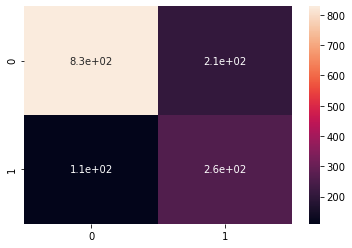

In [142]:
accuracy_lgb, precision_lbg, recall_lbg, F1_lgb, F2_lgb, lgb_pred = evaluate_model(lgb_model, X_test_, y_test)

### Predict on a unknown dataset (Testset)

In [143]:
# Use .predict method # .predict_proba is available just for classification

In [144]:
model_results = pd.DataFrame([['LightGBM Classifier', accuracy_lgb, precision_lbg, recall_lbg, F1_lgb, F2_lgb]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Precision  \
0                                    Decision Tree  0.701705   0.451346   
1   Decision Tree(With Only Feature of Importance)  0.710938   0.464876   
2                                    Random Forest  0.796165   0.621469   
3  Random Forest(With Only features of Importance)  0.784801   0.598315   
4                           Support Vector Machine  0.774148   0.554672   
5                              LightGBM Classifier  0.774858   0.559574   

     Recall  F1_score  F2_score  
0  0.584450  0.509346  0.551899  
1  0.603217  0.525088  0.569332  
2  0.589812  0.605227  0.595883  
3  0.571046  0.584362  0.576299  
4  0.747989  0.636986  0.699248  
5  0.705094  0.623962  0.670234

### KNeighbors Classifier

### Create the Model

In [145]:
# Code here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

### Train the Model

In [146]:
# Use the .fit method
knn.fit(X_train_, y_train)

KNeighborsClassifier()

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.88      0.69      0.77      1035
           1       0.46      0.75      0.57       373

    accuracy                           0.70      1408
   macro avg       0.67      0.72      0.67      1408
weighted avg       0.77      0.70      0.72      1408

Cofusion matrix report : 
              0    1
Negatives  713  322
Positives   95  278


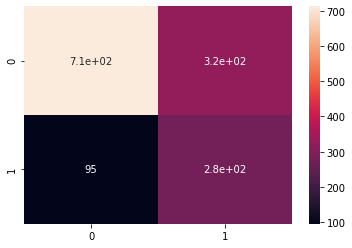

In [147]:
accuracy_knn, precision_knn, recall_knn, F1_knn, F2_knn, knn_pred = evaluate_model(knn, X_test_, y_test)

### Predict on a unknown dataset (Testset)

In [148]:
# Use .predict method # .predict_proba is available just for classification

In [149]:
model_results = pd.DataFrame([['KNearest Neighbors', accuracy_knn, precision_knn, recall_knn, F1_knn, F2_knn]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Precision  \
0                                    Decision Tree  0.701705   0.451346   
1   Decision Tree(With Only Feature of Importance)  0.710938   0.464876   
2                                    Random Forest  0.796165   0.621469   
3  Random Forest(With Only features of Importance)  0.784801   0.598315   
4                           Support Vector Machine  0.774148   0.554672   
5                              LightGBM Classifier  0.774858   0.559574   
6                               KNearest Neighbors  0.703835   0.463333   

     Recall  F1_score  F2_score  
0  0.584450  0.509346  0.551899  
1  0.603217  0.525088  0.569332  
2  0.589812  0.605227  0.595883  
3  0.571046  0.584362  0.576299  
4  0.747989  0.636986  0.699248  
5  0.705094  0.623962  0.670234  
6  0.745308  0.571429  0.664436

## XBoost

Please, keep the following structure to try all the model you want.

### Create the Model

In [150]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

### Train the Model

In [151]:
# Use the .fit method
xgb_model.fit(X_train_, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.72      0.62       373

    accuracy                           0.77      1408
   macro avg       0.71      0.75      0.72      1408
weighted avg       0.79      0.77      0.77      1408

Cofusion matrix report : 
              0    1
Negatives  811  224
Positives  106  267


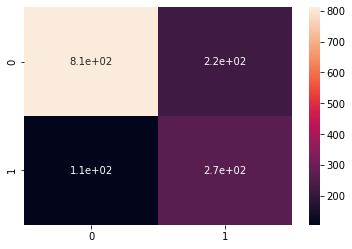

In [152]:
accuracy_xgb, precision_xgb, recall_xgb, F1_xgb, F2_xgb, xgb_pred = evaluate_model(xgb_model, X_test_, y_test)

### Predict on a unknown dataset (Testset)

In [153]:
# Use .predict method # .predict_proba is available just for classification

In [154]:
model_results = pd.DataFrame([['XGBoost Classifier', accuracy_xgb, precision_xgb, recall_xgb, F1_xgb, F2_xgb]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Precision  \
0                                    Decision Tree  0.701705   0.451346   
1   Decision Tree(With Only Feature of Importance)  0.710938   0.464876   
2                                    Random Forest  0.796165   0.621469   
3  Random Forest(With Only features of Importance)  0.784801   0.598315   
4                           Support Vector Machine  0.774148   0.554672   
5                              LightGBM Classifier  0.774858   0.559574   
6                               KNearest Neighbors  0.703835   0.463333   
7                               XGBoost Classifier  0.765625   0.543788   

     Recall  F1_score  F2_score  
0  0.584450  0.509346  0.551899  
1  0.603217  0.525088  0.569332  
2  0.589812  0.605227  0.595883  
3  0.571046  0.584362  0.576299  
4  0.747989  0.636986  0.699248  
5  0.705094  0.623962  0.670234  
6  0.745308  0.571429  0.664436  
7  0.715818  0.618056  0.673222

## Gradient Boosting 

Please, keep the following structure to try all the model you want.

### Create the Model

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

### Train the Model

In [156]:
# Use the .fit method
gb_model.fit(X_train_, y_train)

GradientBoostingClassifier()

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.89      0.80      0.85      1035
           1       0.57      0.74      0.65       373

    accuracy                           0.79      1408
   macro avg       0.73      0.77      0.75      1408
weighted avg       0.81      0.79      0.79      1408

Cofusion matrix report : 
              0    1
Negatives  831  204
Positives   98  275


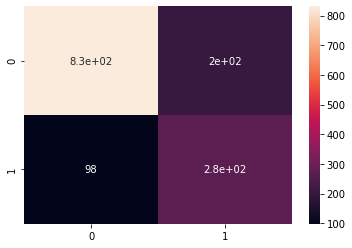

In [157]:
accuracy_gb, precision_gb, recall_gb, F1_gb, F2_gb, gb_pred = evaluate_model(gb_model, X_test_, y_test)

### Predict on a unknown dataset (Testset)

In [158]:
# Use .predict method # .predict_proba is available just for classification

In [159]:
model_results = pd.DataFrame([['Gradient Boosting Classifier',  accuracy_gb, precision_gb, recall_gb, F1_gb, F2_gb]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)
results

Model  Accuracy  Precision  \
0                                    Decision Tree  0.701705   0.451346   
1   Decision Tree(With Only Feature of Importance)  0.710938   0.464876   
2                                    Random Forest  0.796165   0.621469   
3  Random Forest(With Only features of Importance)  0.784801   0.598315   
4                           Support Vector Machine  0.774148   0.554672   
5                              LightGBM Classifier  0.774858   0.559574   
6                               KNearest Neighbors  0.703835   0.463333   
7                               XGBoost Classifier  0.765625   0.543788   
8                     Gradient Boosting Classifier  0.785511   0.574113   

     Recall  F1_score  F2_score  
0  0.584450  0.509346  0.551899  
1  0.603217  0.525088  0.569332  
2  0.589812  0.605227  0.595883  
3  0.571046  0.584362  0.576299  
4  0.747989  0.636986  0.699248  
5  0.705094  0.623962  0.670234  
6  0.745308  0.571429  0.664436  
7  0.715818  0.618056  0.673222  
8  0.737265  0.645540  0.697615

## Stochastic Gradient Boosting

### Create the Model

In [160]:
from sklearn.linear_model import SGDClassifier
sgd_model = XGBClassifier()

### Train the Model

In [161]:
# Use the .fit method
sgd_model.fit(X_train_, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.72      0.62       373

    accuracy                           0.77      1408
   macro avg       0.71      0.75      0.72      1408
weighted avg       0.79      0.77      0.77      1408

Cofusion matrix report : 
              0    1
Negatives  811  224
Positives  106  267


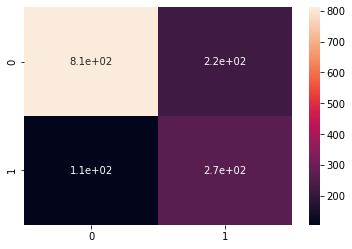

In [162]:
accuracy_sgd, precision_sgd, recall_sgd, F1_sgd, F2_sgd, sgd_pred = evaluate_model(sgd_model, X_test_, y_test)

### Predict on a unknown dataset (Testset)

In [163]:
# Use .predict method # .predict_proba is available just for classification

In [164]:
model_results = pd.DataFrame([['Stochastic Gradient Classifier', accuracy_sgd, precision_sgd, recall_sgd, F1_sgd, F2_sgd]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score'])
results = results.append(model_results, ignore_index = True)
results =  results.sort_values(by='F1_score', ascending=False)
results

Model  Accuracy  Precision  \
8                     Gradient Boosting Classifier  0.785511   0.574113   
4                           Support Vector Machine  0.774148   0.554672   
5                              LightGBM Classifier  0.774858   0.559574   
7                               XGBoost Classifier  0.765625   0.543788   
9                   Stochastic Gradient Classifier  0.765625   0.543788   
2                                    Random Forest  0.796165   0.621469   
3  Random Forest(With Only features of Importance)  0.784801   0.598315   
6                               KNearest Neighbors  0.703835   0.463333   
1   Decision Tree(With Only Feature of Importance)  0.710938   0.464876   
0                                    Decision Tree  0.701705   0.451346   

     Recall  F1_score  F2_score  
8  0.737265  0.645540  0.697615  
4  0.747989  0.636986  0.699248  
5  0.705094  0.623962  0.670234  
7  0.715818  0.618056  0.673222  
9  0.715818  0.618056  0.673222  
2  0.589812  0.605227  0.595883  
3  0.571046  0.584362  0.576299  
6  0.745308  0.571429  0.664436  
1  0.603217  0.525088  0.569332  
0  0.584450  0.509346  0.551899

## Logistic Regression

Please, keep the following structure to try all the model you want.

### Create the Model

In [165]:
from sklearn.linear_model import LogisticRegression
lgr_model = LogisticRegression()

### Train the Model

In [166]:
# Use the .fit method
lgr_model.fit(X_train_, y_train)

LogisticRegression()

### Evaluate the Model on the Evaluation dataset (Evalset)

classification report : 
               precision    recall  f1-score   support

           0       0.92      0.73      0.81      1035
           1       0.52      0.82      0.64       373

    accuracy                           0.75      1408
   macro avg       0.72      0.77      0.72      1408
weighted avg       0.81      0.75      0.77      1408

Cofusion matrix report : 
              0    1
Negatives  756  279
Positives   69  304


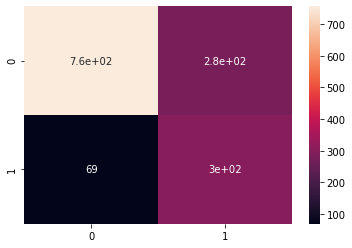

In [167]:
accuracy_lgr, precision_lgr, recall_lgr, F1_lgr, F2_lgr, lgr_pred = evaluate_model(lgr_model, X_test_, y_test)

### Predict on a unknown dataset (Testset)

In [168]:
# Use .predict method # .predict_proba is available just for classification

In [169]:
model_results = pd.DataFrame([['Logistic Regression Classifier', accuracy_lgr, precision_lgr, recall_lgr, F1_lgr, F2_lgr]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])

results = results.append(model_results, ignore_index = True)
results =  results.sort_values(by='F1_score', ascending=False)
results

Model  Accuracy  Precision  \
0                      Gradient Boosting Classifier  0.785511   0.574113   
1                            Support Vector Machine  0.774148   0.554672   
10                   Logistic Regression Classifier  0.752841   0.521441   
2                               LightGBM Classifier  0.774858   0.559574   
3                                XGBoost Classifier  0.765625   0.543788   
4                    Stochastic Gradient Classifier  0.765625   0.543788   
5                                     Random Forest  0.796165   0.621469   
6   Random Forest(With Only features of Importance)  0.784801   0.598315   
7                                KNearest Neighbors  0.703835   0.463333   
8    Decision Tree(With Only Feature of Importance)  0.710938   0.464876   
9                                     Decision Tree  0.701705   0.451346   

      Recall  F1_score  F2_score  
0   0.737265  0.645540  0.697615  
1   0.747989  0.636986  0.699248  
10  0.815013  0.635983  0.732530  
2   0.705094  0.623962  0.670234  
3   0.715818  0.618056  0.673222  
4   0.715818  0.618056  0.673222  
5   0.589812  0.605227  0.595883  
6   0.571046  0.584362  0.576299  
7   0.745308  0.571429  0.664436  
8   0.603217  0.525088  0.569332  
9   0.584450  0.509346  0.551899

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

### Model Tuning for Logistic Rgression Classifier

In [170]:
# Code here
from sklearn.model_selection import GridSearchCV
param_grid= [{'penalty': ['l1', 'l2', 'elasticnet'],\
             'C': [0.001,0.009,0.01,5,10,25], 'intercept_scaling':[ 4, 7],\
              'max_iter': [200], 'class_weight':['balanced'], \
              'solver':['saga'], 'tol': 10.0 ** -np.arange(1, 7) }]

In [171]:
logistic_grid_search = GridSearchCV(lgr_model,param_grid, scoring='f1', cv=10, return_train_score=True)

In [172]:
logistic_grid_search.fit(X_train_, y_train)

KeyboardInterrupt: 

In [ ]:
logistic_grid_search.best_estimator_

In [ ]:
from sklearn.metrics import SCORERS

In [ ]:
#best_lgr = logistic_grid_search.best_estimator_.predict(X_test)

In [ ]:
accuracy_lgr_tuned, precision_lgr_tuned, recall_lgr_tuned, F1_lgr_tuned, F2_lgr_tuned, lgr_pred_tuned\
= evaluate_model(logistic_grid_search.best_estimator_, X_test_, y_test)

In [ ]:
tuned_results = pd.DataFrame([['Logistic Regression Classifier', accuracy_lgr_tuned, precision_lgr_tuned, recall_lgr_tuned, F1_lgr_tuned, F2_lgr_tuned\
]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])


In [ ]:
tuned_results

### Model Tuning for Gradient Boosting Classifier

In [ ]:
param_grid_gb = {
    'min_samples_split': [200, 85, 108],\
    'loss': ['deviance', 'exponential', 'log_loss'],\
    'learning_rate': [0.1, 0.3, 0.7, 0.9],\
    'min_samples_leaf': [60, 40, 35],\
    'n_estimators': [100, 150, 300],\
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
gb_grid_search = GridSearchCV(gb_model,param_grid_gb, scoring='f1', cv=10, return_train_score=True)

In [ ]:
gb_grid_search.fit(X_train_, y_train)

In [ ]:
gb_grid_search.best_estimator_

In [ ]:
accuracy_gb_tuned, precision_gb_tuned, recall_gb_tuned, F1_gb_tuned, F2_gb_tuned, gb_pred_tuned\
= evaluate_model(gb_grid_search.best_estimator_, X_test_, y_test)

In [ ]:
tuned_gb = pd.DataFrame([['Gradient Boosting Classifier', accuracy_gb_tuned, precision_gb_tuned, recall_gb_tuned, F1_gb_tuned, F2_gb_tuned\
]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])
tuned_results = tuned_results.append(tuned_gb)

In [ ]:
tuned_results

### Model Tuning for Support  Vector Machine Classifier

In [ ]:
param_grid_svm= [{'C': [0.001,0.009,0.01,5,10,25], 'gamma':[ 'scale', 'auto'],\
              'max_iter': [200], 'class_weight':['balanced'], \
              'kernel':['linear', 'poly'], 'probability': [True], 'random_state': [126, 42, 90], \
              'tol': 10.0 ** -np.arange(1, 7)}]

In [ ]:
svm_grid_search = GridSearchCV(svm,param_grid_svm, scoring='f1', cv=10, return_train_score=True)

In [ ]:
svm_grid_search.fit(X_train_, y_train)

In [ ]:
svm_grid_search.best_estimator_

In [ ]:
from sklearn.metrics import SCORERS

In [ ]:
#best_lgr = logistic_grid_search.best_estimator_.predict(X_test)

In [ ]:
accuracy_svm_tuned, precision_svm_tuned, recall_svm_tuned, F1_svm_tuned, F2_svm_tuned, svm_pred_tuned\
= evaluate_model(svm_grid_search.best_estimator_, X_test_, y_test)

In [ ]:
tuned_svm = pd.DataFrame([['Support Vector Machine', accuracy_svm_tuned, precision_svm_tuned, recall_svm_tuned, F1_svm_tuned, F2_svm_tuned\
]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])
tuned_results = tuned_results.append(tuned_svm)

In [ ]:
tuned_results

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [ ]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app

In [ ]:
f2_scorer = make_scorer(fbeta_score, beta=2)

### Model Tuning for Logistic Rgression Classifier

In [ ]:
# Code here
from skopt import BayesSearchCV
param_grid= [{'penalty': ['l1', 'l2'],\
             'C': [0.001,0.009,0.01,5, 6.4, 7, 10,25], 'intercept_scaling':[1, 3.7, 2, 4.3, 7, 10],\
              'max_iter': [5, 50, 100, 150, 200, 400, 300, 500], 'class_weight':['balanced'], \
              'solver':['saga', 'liblinear'], 'tol': 10.0 ** -np.arange(1, 7), 'l1_ratio': np.arange(0,1, 0.2) }]

In [ ]:
logistic_bayes_search = BayesSearchCV(lgr_model,param_grid, scoring=f2_scorer, cv=5, return_train_score=True, n_iter=50)

In [ ]:
logistic_bayes_search.fit(X_train_, y_train)

In [ ]:
logistic_bayes_search.best_estimator_

In [ ]:
from sklearn.metrics import SCORERS

In [ ]:
#best_lgr = logistic_grid_search.best_estimator_.predict(X_test)

In [ ]:
accuracy_lgr_tuned, precision_lgr_tuned, recall_lgr_tuned, F1_lgr_tuned, F2_lgr_tuned, lgr_pred_tuned\
= evaluate_model(logistic_bayes_search.best_estimator_, X_test_, y_test)

In [ ]:
tuned_results_bcv = pd.DataFrame([['Logistic Regression Classifier', accuracy_lgr_tuned, precision_lgr_tuned, recall_lgr_tuned, F1_lgr_tuned, F2_lgr_tuned\
]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])


In [ ]:
tuned_results_bcv

### Model Tuning for Gradient Boosting Classifier

In [ ]:
param_grid_gb = {
    'min_samples_split': [200, 85, 108, 500, 800],\
    'loss': ['deviance', 'exponential', 'log_loss'],\
    'learning_rate': np.arange(0,1,0.1)\
    'min_samples_leaf': [60, 40, 35],\
    'n_estimators': [100, 150, 300],\
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(0,10, 1),\
    'ccp_alpha=0.0': [0.3,, 0.5]
}

In [ ]:
np.arange(0,10, 1)

In [ ]:
gb_bayes_search = BayesSearchCV(gb_model,param_grid_gb, scoring='f1', cv=5, return_train_score=True)

In [ ]:
gb_bayes_search.fit(X_train_, y_train)

In [ ]:
gb_bayes_search.best_estimator_

In [ ]:
accuracy_gb_tuned, precision_gb_tuned, recall_gb_tuned, F1_gb_tuned, F2_gb_tuned, gb_pred_tuned\
= evaluate_model(gb_bayes_search.best_estimator_, X_test_, y_test)

In [ ]:
tuned_gb = pd.DataFrame([['Gradient Boosting Classifier', accuracy_gb_tuned, precision_gb_tuned, recall_gb_tuned, F1_gb_tuned, F2_gb_tuned\
]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])
tuned_results_bcv = tuned_results_bcv.append(tuned_gb)

In [ ]:
tuned_results

### Model Tuning for Support  Vector Machine Classifier

In [ ]:
param_grid_svm= [{'C': [0.01,5, 6, 8, 8.6,10,25], 'gamma':[ 'scale', 'auto'],\
              'max_iter': [100, 200, 400, 1000, 5000], 'class_weight':['balanced'], \
              'kernel':['sigmoid', 'poly'], 'probability': [True], 'random_state': [126, 42, 90], \
              'tol': 10.0 ** -np.arange(1, 7)}, 'coef0':np.arange(0,1,0.3) ]

In [ ]:
svm_bayes_search = BayesSearchCV(svm,param_grid_svm, scoring='f1', cv=5, return_train_score=True)

In [ ]:
svm_bayes_search.fit(X_train_, y_train)

In [ ]:
svm_bayes_search.best_estimator_

In [ ]:
from sklearn.metrics import SCORERS

In [ ]:
#best_lgr = logistic_grid_search.best_estimator_.predict(X_test)

In [ ]:
accuracy_svm_tuned, precision_svm_tuned, recall_svm_tuned, F1_svm_tuned, F2_svm_tuned, svm_pred_tuned\
= evaluate_model(svm_bayes_search.best_estimator_, X_test_, y_test)

In [ ]:
tuned_svm = pd.DataFrame([['Support Vector Machine', accuracy_svm_tuned, precision_svm_tuned, recall_svm_tuned, F1_svm_tuned, F2_svm_tuned\
]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F2_score' ])
tuned_results_bcv = tuned_results_bcv.append(tuned_svm)

In [ ]:
tuned_results